In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import seaborn as sns
import pandas as pd
import os
import MDAnalysis as mda
from MDAnalysis.coordinates.GRO import GROWriter
from scipy.spatial import Voronoi

/mnt/home/asahoo/venv/lib/python3.8/site-packages/MDAnalysis/coordinates/XDR.py:203: UserWarning: Cannot write lock/offset file in same location as {self.filename}. Using slow offset calculation.
  warnings.warn(f"Cannot write lock/offset file in same location as "
/mnt/home/asahoo/venv/lib/python3.8/site-packages/MDAnalysis/coordinates/XDR.py:259: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N2/.traj_continuous_v1_400_reduced.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


In [42]:
def extract_centered_z_coordinates(pdb_path, xtc_path, atom_selection_po4='name P', atom_selection_ca='name CA', last_n_frames=1000, Z_po4 = [], Z_ca = []):
    u = mda.Universe(pdb_path, xtc_path)
    po4 = u.select_atoms(atom_selection_po4)
    ca = u.select_atoms(atom_selection_ca)
    for ts in u.trajectory[-last_n_frames:]:
        po4_z = po4.positions[:, 2]
        ca_z = ca.positions[:, 2]
        center = np.mean(po4_z)
        po4_z -= center
        ca_z -= center
        Z_po4.append(po4_z.copy())
        Z_ca.append(ca_z.copy())
    return Z_po4, Z_ca

def extract_centered_z_coordinates_pep1(pdb_path, xtc_path, atom_selection_po4='name P', atom_selection_ca='name CA', last_n_frames=1000, Z_po4 = [], Z_ca = []):
    u = mda.Universe(pdb_path, xtc_path)
    po4 = u.select_atoms(atom_selection_po4)
    ca = u.select_atoms(atom_selection_ca)
    for ts in u.trajectory[-last_n_frames:]:
        po4_z = po4.positions[:, 2]
        ca_z = ca.positions[:, 2][:34]
        center = np.mean(po4_z)
        po4_z -= center
        ca_z -= center
        Z_po4.append(po4_z.copy())
        Z_ca.append(ca_z.copy())
    return Z_po4, Z_ca

def extract_centered_z_coordinates_pep2(pdb_path, xtc_path, atom_selection_po4='name P', atom_selection_ca='name CA', last_n_frames=1000, Z_po4 = [], Z_ca = []):
    u = mda.Universe(pdb_path, xtc_path)
    po4 = u.select_atoms(atom_selection_po4)
    ca = u.select_atoms(atom_selection_ca)
    for ts in u.trajectory[-last_n_frames:]:
        po4_z = po4.positions[:, 2]
        ca_z = ca.positions[:, 2][34:]
        center = np.mean(po4_z)
        po4_z -= center
        ca_z -= center
        Z_po4.append(po4_z.copy())
        Z_ca.append(ca_z.copy())
    return Z_po4, Z_ca


In [28]:
Z_po4, Z_ca = extract_centered_z_coordinates('/mnt/ceph/users/mmofidi/gromacs/reduced/bound/N1/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/bound/N1/traj_continuous_v1_400_reduced.xtc', Z_po4 = [], Z_ca = [])
Z_po4, Z_ca = extract_centered_z_coordinates('/mnt/ceph/users/mmofidi/gromacs/reduced/bound/N2/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/bound/N2/traj_continuous_v1_400_reduced.xtc', Z_po4 = Z_po4, Z_ca = Z_ca)
Z_po4, Z_ca = extract_centered_z_coordinates('/mnt/ceph/users/mmofidi/gromacs/reduced/bound/N3/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/bound/N3/traj_continuous_v1_400_reduced.xtc', Z_po4 = Z_po4, Z_ca = Z_ca)
Z_po4, Z_ca = extract_centered_z_coordinates('/mnt/ceph/users/mmofidi/gromacs/reduced/bound/N4/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/bound/N4/traj_continuous_v1_400_reduced.xtc', Z_po4 = Z_po4, Z_ca = Z_ca)
po4_bound = np.hstack(Z_po4)
ca_bound = np.hstack(Z_ca)

/mnt/home/asahoo/venv/lib/python3.8/site-packages/MDAnalysis/coordinates/XDR.py:203: UserWarning: Cannot write lock/offset file in same location as {self.filename}. Using slow offset calculation.
  warnings.warn(f"Cannot write lock/offset file in same location as "
/mnt/home/asahoo/venv/lib/python3.8/site-packages/MDAnalysis/coordinates/XDR.py:259: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/mnt/ceph/users/mmofidi/gromacs/reduced/bound/N1/.traj_continuous_v1_400_reduced.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))
/mnt/home/asahoo/venv/lib/python3.8/site-packages/MDAnalysis/coordinates/XDR.py:259: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/mnt/ceph/users/mmofidi/gromacs/reduced/bound/N2/.traj_continuous_v1_400_reduced.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))
/mnt/home/asahoo/venv/lib/python3.8/site-packages/MDAnalysis/coordinates/XDR.py:259: UserWar

In [29]:
Z_po4, Z_ca = extract_centered_z_coordinates('/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N2/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N2/traj_continuous_v1_400_reduced.xtc', Z_po4 = [], Z_ca = [])
Z_po4, Z_ca = extract_centered_z_coordinates('/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N4/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N4/traj_continuous_v1_400_reduced.xtc', Z_po4 = Z_po4, Z_ca = Z_ca)
Z_po4, Z_ca = extract_centered_z_coordinates('/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N5/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N5/traj_continuous_v1_400_reduced.xtc', Z_po4 = Z_po4, Z_ca = Z_ca)
Z_po4, Z_ca = extract_centered_z_coordinates('/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N7/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N7/traj_continuous_v1_400_reduced.xtc', Z_po4 = Z_po4, Z_ca = Z_ca)
po4_multiple = np.hstack(Z_po4)
ca_multiple = np.hstack(Z_ca)

/mnt/home/asahoo/venv/lib/python3.8/site-packages/MDAnalysis/coordinates/XDR.py:259: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N2/.traj_continuous_v1_400_reduced.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))
/mnt/home/asahoo/venv/lib/python3.8/site-packages/MDAnalysis/coordinates/XDR.py:259: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N4/.traj_continuous_v1_400_reduced.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))
/mnt/home/asahoo/venv/lib/python3.8/site-packages/MDAnalysis/coordinates/XDR.py:259: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N5/.traj_continuous_v1_400_reduced.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))
/mnt/home/asahoo/venv/lib/py

In [30]:
Z_po4, Z_ca = extract_centered_z_coordinates('/mnt/ceph/users/mmofidi/gromacs/reduced/multi_bounds/N1/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/multi_bounds/N1/traj_continuous_v1_400_reduced.xtc', Z_po4 = [], Z_ca = [])
Z_po4, Z_ca = extract_centered_z_coordinates('/mnt/ceph/users/mmofidi/gromacs/reduced/multi_bounds/N2/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/multi_bounds/N2/traj_continuous_v1_400_reduced.xtc', Z_po4 = Z_po4, Z_ca = Z_ca)
Z_po4, Z_ca = extract_centered_z_coordinates('/mnt/ceph/users/mmofidi/gromacs/reduced/multi_bounds/N4/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/multi_bounds/N4/traj_continuous_v1_400_reduced.xtc', Z_po4 = Z_po4, Z_ca = Z_ca)
Z_po4, Z_ca = extract_centered_z_coordinates('/mnt/ceph/users/mmofidi/gromacs/reduced/multi_bounds/N5/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/multi_bounds/N5/traj_continuous_v1_400_reduced.xtc', Z_po4 = Z_po4, Z_ca = Z_ca)
po4_multi_bound = np.hstack(Z_po4)
ca_multi_bound = np.hstack(Z_ca)

/mnt/home/asahoo/venv/lib/python3.8/site-packages/MDAnalysis/coordinates/XDR.py:259: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/mnt/ceph/users/mmofidi/gromacs/reduced/multi_bounds/N1/.traj_continuous_v1_400_reduced.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))
/mnt/home/asahoo/venv/lib/python3.8/site-packages/MDAnalysis/coordinates/XDR.py:259: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/mnt/ceph/users/mmofidi/gromacs/reduced/multi_bounds/N2/.traj_continuous_v1_400_reduced.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))
/mnt/home/asahoo/venv/lib/python3.8/site-packages/MDAnalysis/coordinates/XDR.py:259: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/mnt/ceph/users/mmofidi/gromacs/reduced/multi_bounds/N4/.traj_continuous_v1_400_reduced.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))
/mnt/home/asahoo

In [34]:
Z_po4, Z_ca = extract_centered_z_coordinates('/mnt/ceph/users/mmofidi/gromacs/reduced/unbound/N1/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/unbound/N1/traj_continuous_v1_400_reduced.xtc', Z_po4 = [], Z_ca = [])
Z_po4, Z_ca = extract_centered_z_coordinates('/mnt/ceph/users/mmofidi/gromacs/reduced/unbound/N2/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/unbound/N2/traj_continuous_v1_400_reduced.xtc', Z_po4 = Z_po4, Z_ca = Z_ca)
Z_po4, Z_ca = extract_centered_z_coordinates('/mnt/ceph/users/mmofidi/gromacs/reduced/unbound/N3/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/unbound/N3/traj_continuous_v1_400_reduced.xtc', Z_po4 = Z_po4, Z_ca = Z_ca)
Z_po4, Z_ca = extract_centered_z_coordinates('/mnt/ceph/users/mmofidi/gromacs/reduced/unbound/N4/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/unbound/N4/traj_continuous_v1_400_reduced.xtc', Z_po4 = Z_po4, Z_ca = Z_ca)
po4_unbound = np.hstack(Z_po4)
ca_unbound = np.hstack(Z_ca)

/mnt/home/asahoo/venv/lib/python3.8/site-packages/MDAnalysis/coordinates/XDR.py:203: UserWarning: Cannot write lock/offset file in same location as {self.filename}. Using slow offset calculation.
  warnings.warn(f"Cannot write lock/offset file in same location as "
/mnt/home/asahoo/venv/lib/python3.8/site-packages/MDAnalysis/coordinates/XDR.py:259: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/mnt/ceph/users/mmofidi/gromacs/reduced/unbound/N1/.traj_continuous_v1_400_reduced.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))
/mnt/home/asahoo/venv/lib/python3.8/site-packages/MDAnalysis/coordinates/XDR.py:259: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/mnt/ceph/users/mmofidi/gromacs/reduced/unbound/N2/.traj_continuous_v1_400_reduced.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))
/mnt/home/asahoo/venv/lib/python3.8/site-packages/MDAnalysis/coordinates/XDR.py:259: Use

In [31]:
Z_po4, Z_ca = extract_centered_z_coordinates('/mnt/ceph/users/mmofidi/gromacs/reduced/multi_bounds/N3/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/multi_bounds/N3/traj_continuous_v1_400_reduced.xtc', Z_po4 = [], Z_ca = [])
Z_po4, Z_ca = extract_centered_z_coordinates('/mnt/ceph/users/mmofidi/gromacs/reduced/multi_bounds/N7/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/multi_bounds/N7/traj_continuous_v1_400_reduced.xtc', Z_po4 = Z_po4, Z_ca = Z_ca)
po4_multi_bound_oneup = np.hstack(Z_po4)
ca_multi_bound_oneup = np.hstack(Z_ca)

/mnt/home/asahoo/venv/lib/python3.8/site-packages/MDAnalysis/coordinates/XDR.py:259: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/mnt/ceph/users/mmofidi/gromacs/reduced/multi_bounds/N3/.traj_continuous_v1_400_reduced.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))
/mnt/home/asahoo/venv/lib/python3.8/site-packages/MDAnalysis/coordinates/XDR.py:259: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/mnt/ceph/users/mmofidi/gromacs/reduced/multi_bounds/N7/.traj_continuous_v1_400_reduced.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


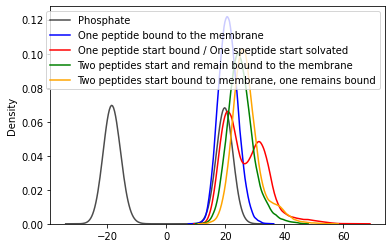

In [48]:
sns.kdeplot(po4_bound, label='Phosphate', c='black', alpha=0.7)
sns.kdeplot(ca_bound, label='One peptide bound to the membrane', c='blue')
sns.kdeplot(ca_multiple, label='One peptide start bound / One speptide start solvated', c='red')
sns.kdeplot(ca_multi_bound, label='Two peptides start and remain bound to the membrane', c='green')
sns.kdeplot(ca_multi_bound_oneup, label='Two peptides start bound to membrane, one remains bound', c='orange')
plt.legend()
plt.savefig('protein_density_ALL.svg', dpi=300)

In [ ]:
# gray for PO4
# blue for bound
# red for multiple
# green for multi bound
# orange for multi bound one up

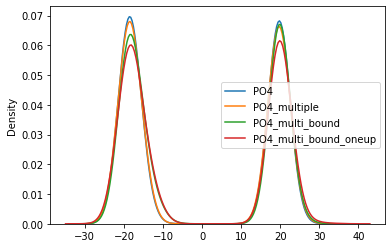

In [33]:
sns.kdeplot(po4_bound, label='PO4')
sns.kdeplot(po4_multiple, label='PO4_multiple')
sns.kdeplot(po4_multi_bound, label='PO4_multi_bound')
sns.kdeplot(po4_multi_bound_oneup, label='PO4_multi_bound_oneup')
plt.legend()
plt.savefig('po4_density.png')


In [43]:
Z_po4, Z_ca = extract_centered_z_coordinates('/mnt/ceph/users/mmofidi/gromacs/reduced/unbound/N1/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/unbound/N1/traj_continuous_v1_400_reduced.xtc', Z_po4 = [], Z_ca = [])
Z_po4, Z_ca = extract_centered_z_coordinates('/mnt/ceph/users/mmofidi/gromacs/reduced/unbound/N2/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/unbound/N2/traj_continuous_v1_400_reduced.xtc', Z_po4 = Z_po4, Z_ca = Z_ca)
Z_po4, Z_ca = extract_centered_z_coordinates('/mnt/ceph/users/mmofidi/gromacs/reduced/unbound/N3/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/unbound/N3/traj_continuous_v1_400_reduced.xtc', Z_po4 = Z_po4, Z_ca = Z_ca)
Z_po4, Z_ca = extract_centered_z_coordinates('/mnt/ceph/users/mmofidi/gromacs/reduced/unbound/N4/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/unbound/N4/traj_continuous_v1_400_reduced.xtc', Z_po4 = Z_po4, Z_ca = Z_ca)
po4_unbound = np.hstack(Z_po4)
ca_unbound = np.hstack(Z_ca)

Z_po4, Z_ca = extract_centered_z_coordinates_pep2('/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N2/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N2/traj_continuous_v1_400_reduced.xtc', Z_po4 = [], Z_ca = [])
Z_po4, Z_ca = extract_centered_z_coordinates_pep2('/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N1/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N1/traj_continuous_v1_400_reduced.xtc', Z_po4 = Z_po4, Z_ca = Z_ca)
Z_po4, Z_ca = extract_centered_z_coordinates_pep2('/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N3/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N3/traj_continuous_v1_400_reduced.xtc', Z_po4 = Z_po4, Z_ca = Z_ca)
Z_po4, Z_ca = extract_centered_z_coordinates_pep2('/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N4/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N4/traj_continuous_v1_400_reduced.xtc', Z_po4 = Z_po4, Z_ca = Z_ca)
Z_po4, Z_ca = extract_centered_z_coordinates_pep2('/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N5/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N5/traj_continuous_v1_400_reduced.xtc', Z_po4 = Z_po4, Z_ca = Z_ca)
Z_po4, Z_ca = extract_centered_z_coordinates_pep2('/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N5/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N5/traj_continuous_v1_400_reduced.xtc', Z_po4 = Z_po4, Z_ca = Z_ca)
Z_po4, Z_ca = extract_centered_z_coordinates_pep2('/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N8/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N8/traj_continuous_v1_400_reduced.xtc', Z_po4 = Z_po4, Z_ca = Z_ca)

po4_multiple_all = np.hstack(Z_po4)
ca_multiple_all = np.hstack(Z_ca)

/mnt/home/asahoo/venv/lib/python3.8/site-packages/MDAnalysis/coordinates/XDR.py:203: UserWarning: Cannot write lock/offset file in same location as {self.filename}. Using slow offset calculation.
  warnings.warn(f"Cannot write lock/offset file in same location as "
/mnt/home/asahoo/venv/lib/python3.8/site-packages/MDAnalysis/coordinates/XDR.py:259: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/mnt/ceph/users/mmofidi/gromacs/reduced/unbound/N1/.traj_continuous_v1_400_reduced.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))
/mnt/home/asahoo/venv/lib/python3.8/site-packages/MDAnalysis/coordinates/XDR.py:259: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/mnt/ceph/users/mmofidi/gromacs/reduced/unbound/N2/.traj_continuous_v1_400_reduced.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))
/mnt/home/asahoo/venv/lib/python3.8/site-packages/MDAnalysis/coordinates/XDR.py:259: Use

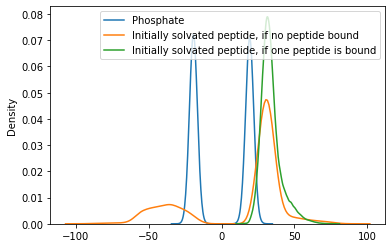

In [49]:
sns.kdeplot(po4_unbound, label='Phosphate')
sns.kdeplot(ca_unbound, label='Initially solvated peptide, if no peptide bound')
sns.kdeplot(ca_multiple_all, label='Initially solvated peptide, if one peptide is bound')
plt.legend()
plt.savefig('protein_density_unbound.svg', dpi=300)

In [ ]:
# po4 to be gray
# blue for single
# orange for multiple